In [20]:
import matplotlib.pyplot as plt
import cv2

# Carregar as imagens
xadrez_img = cv2.imread('mapas_Brasil/XADREZ.png', cv2.IMREAD_GRAYSCALE)
xadrez_lowCont_img = cv2.imread('mapas_Brasil/xadrez_lowCont.png', cv2.IMREAD_GRAYSCALE)

# Função para exibir histograma
def plot_histogram(image, title):
    plt.hist(image.ravel(), 256, [0,256])
    plt.title(title)
    plt.xlabel('Intensidade')
    plt.ylabel('Quantidade de Pixels')
    plt.show()



[ WARN:0@281.574] global loadsave.cpp:248 findDecoder imread_('mapas_Brasil/XADREZ.png'): can't open/read file: check file path/integrity
[ WARN:0@281.575] global loadsave.cpp:248 findDecoder imread_('mapas_Brasil/xadrez_lowCont.png'): can't open/read file: check file path/integrity


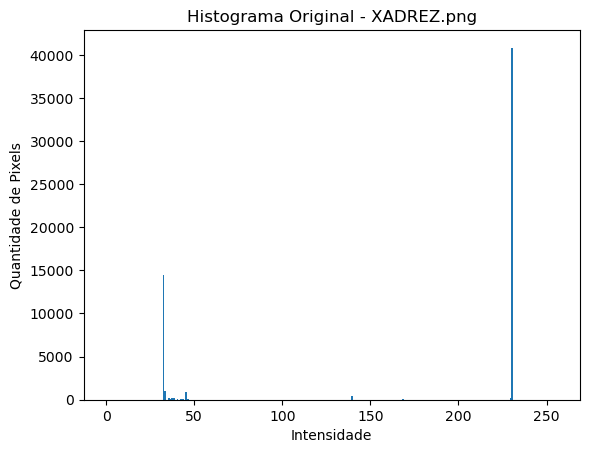

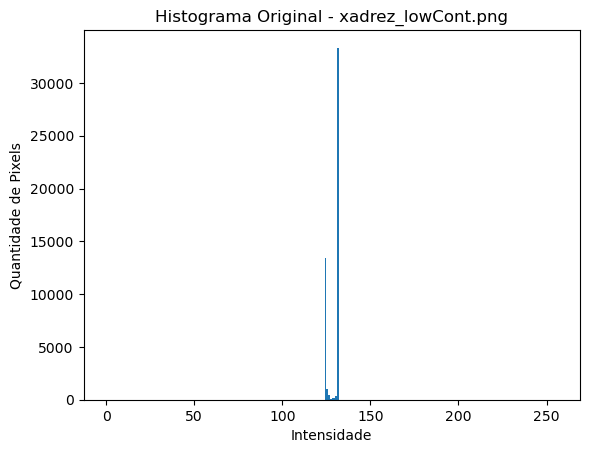

In [21]:
from PIL import Image
import numpy as np

# Carregar as imagens usando PIL
xadrez_img_pil = Image.open('XADREZ.png').convert('L')
xadrez_lowCont_img_pil = Image.open('xadrez_lowCont.png').convert('L')

# Converter para numpy array
xadrez_img_array = np.array(xadrez_img_pil)
xadrez_lowCont_img_array = np.array(xadrez_lowCont_img_pil)

# Exibir histogramas originais
plot_histogram(xadrez_img_array, 'Histograma Original - XADREZ.png')
plot_histogram(xadrez_lowCont_img_array, 'Histograma Original - xadrez_lowCont.png')

# Equalização Global

In [22]:
def equalize_histogram_global(image):
    """Equalização de histograma global."""
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum() # soma cumulativa
    cdf_m = np.ma.masked_equal(cdf, 0) #mascara para os valores 0
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min()) # equalização em si
    cdf = np.ma.filled(cdf_m, 0).astype('uint8') # coloca os zeros de volta
    return cdf[image]

# Aplicar equalização de histograma global
xadrez_img_equalized_global = equalize_histogram_global(xadrez_img_array)
xadrez_lowCont_img_equalized_global = equalize_histogram_global(xadrez_lowCont_img_array)


# Equalização Local

In [23]:
def equalize_histogram_local(image, m=4):
    """Equalização de histograma local."""
    h, w = image.shape
    pad = m // 2 # borda
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant',constant_values=(0,0))
    output = np.zeros_like(image) # Cria imagem de saída
    for i in range(h):
        for j in range(w):
            window = padded_image[i:i+m, j:j+m] # Janela deslizante
            hist, _ = np.histogram(window, 256, [0,256])
            cdf = hist.cumsum() # soma cumulativa
            cdf_m = np.ma.masked_equal(cdf, 0) # mascara de zeros
            cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min()) #equalização em si
            cdf = np.ma.filled(cdf_m, 0).astype('uint8') # bota os zeros de volta
            output[i, j] = cdf[window[pad, pad]]
    return output

# Aplicar equalização de histograma local
xadrez_img_equalized_local = equalize_histogram_local(xadrez_img_array)
xadrez_lowCont_img_equalized_local = equalize_histogram_local(xadrez_lowCont_img_array)


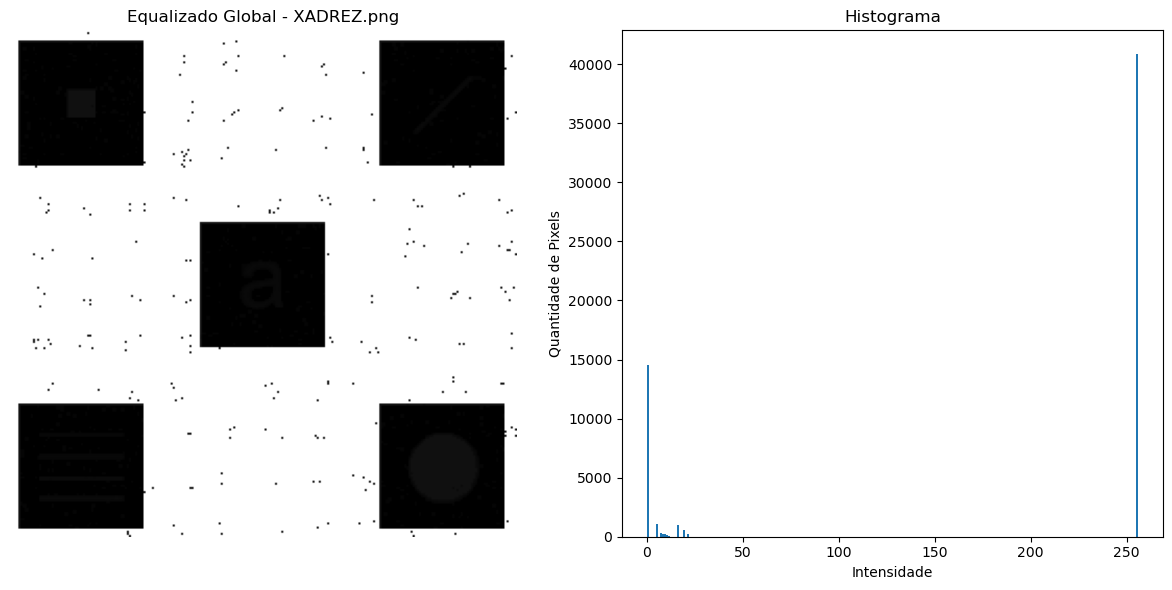

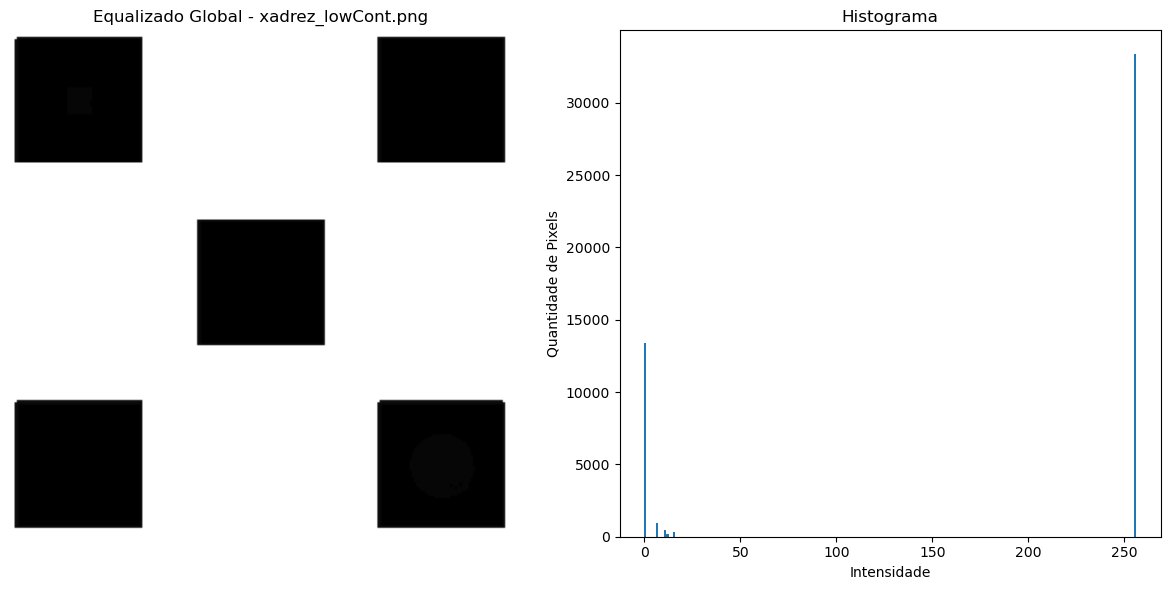

In [24]:
def plot_image_and_histogram(image, title):
    """Exibe a imagem e seu histograma."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Exibir imagem
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title(title)
    ax[0].axis('off')

    # Exibir histograma
    ax[1].hist(image.ravel(), 256, [0,256])
    ax[1].set_title('Histograma')
    ax[1].set_xlabel('Intensidade')
    ax[1].set_ylabel('Quantidade de Pixels')

    plt.tight_layout()
    plt.show()

# Aplicar equalização de histograma global
xadrez_img_equalized_global = equalize_histogram_global(xadrez_img_array)
xadrez_lowCont_img_equalized_global = equalize_histogram_global(xadrez_lowCont_img_array)

# Exibir imagens e histogramas após equalização global
plot_image_and_histogram(xadrez_img_equalized_global, 'Equalizado Global - XADREZ.png')
plot_image_and_histogram(xadrez_lowCont_img_equalized_global, 'Equalizado Global - xadrez_lowCont.png')

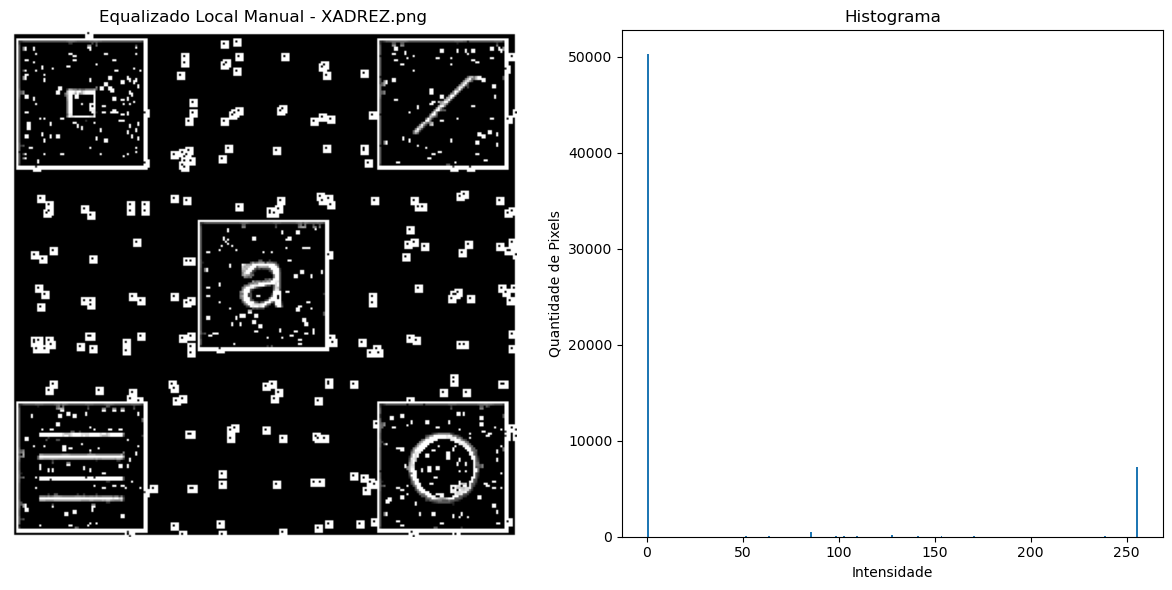

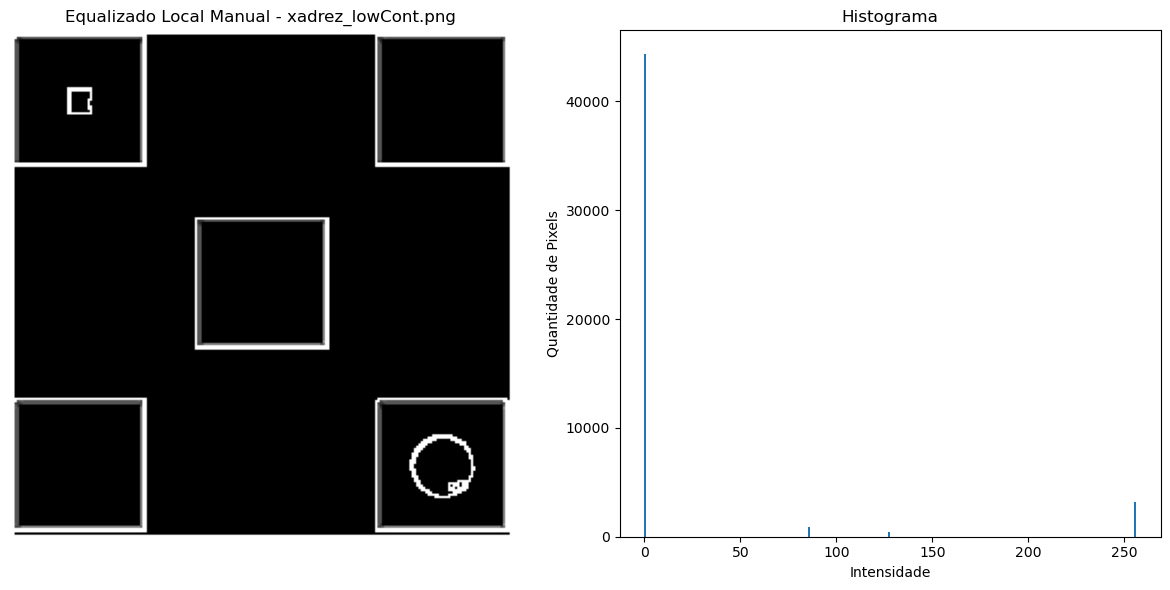

In [25]:
# Aplicar equalização de histograma local
xadrez_img_equalized_local_manual = equalize_histogram_local(xadrez_img_array)
xadrez_lowCont_img_equalized_local_manual = equalize_histogram_local(xadrez_lowCont_img_array)

# Exibir imagens e histogramas após equalização local manual
plot_image_and_histogram(xadrez_img_equalized_local_manual, 'Equalizado Local Manual - XADREZ.png')
plot_image_and_histogram(xadrez_lowCont_img_equalized_local_manual, 'Equalizado Local Manual - xadrez_lowCont.png')